****Missing Data****

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

What does "missing data" mean? What is a missing value? It depends on the origin of the data and the context it was generated. For example, for a survey, a Salary field with an empty value, or a number 0, or an invalid value (a string for example) can be considered "missing data". These concepts are related to the values that Python will consider "Falsy":

In [3]:
falsy_values = (0, False, None, '', [], {})

For Python, all the values above are considered "falsy":

In [4]:
any(falsy_values)

False

Numpy has a special "nullable" value for numbers which is np.nan. It's NaN: "Not a number"

In [5]:
np.nan

nan

In [6]:
3 + np.nan

nan

In [7]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [8]:
a.sum()

nan

In [9]:
a.mean()

nan

In [11]:
a = np.array([1, 2, 3, np.nan, None, 4], dtype='float')

In [12]:
a

array([ 1.,  2.,  3., nan, nan,  4.])

In [14]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [15]:
a.mean()

nan

In [16]:
a.sum()

nan

Numpy also supports an "Infinite" type:

In [17]:
np.inf

inf

In [18]:
3 + np.inf

inf

In [19]:
np.inf / 3

inf

In [20]:
np.inf / np.inf

nan

In [22]:
b = np.array([1, 2, 3, np.inf, np.nan, 4], dtype=np.float64)

In [23]:
b.sum()

nan

***Checking for nan or inf***

There are two functions: np.isnan and np.isinf that will perform the desired checks:

In [24]:
np.isnan(np.nan)

True

In [25]:
np.isinf(np.inf)

True

In [26]:
np.isfinite(np.nan), np.isfinite(np.inf)

(False, False)

In [27]:
np.isnan(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False,  True, False, False])

In [28]:
np.isinf(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False, False,  True, False])

In [29]:
np.isfinite(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([ True,  True,  True, False, False,  True])

***Filtering them out***

In [30]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [31]:
a[~np.isnan(a)]

array([1., 2., 3., 4.])

In [32]:
a[np.isfinite(a)]

array([1., 2., 3., 4.])

In [33]:
a[np.isfinite(a)].sum()

10.0

In [34]:
a[np.isfinite(a)].mean()

2.5

****Handling Missing Data with Pandas****

***Pandas utility functions***

In [35]:
pd.isnull(np.nan)

True

In [36]:
pd.isnull(None)

True

In [37]:
pd.isna(np.nan)

True

In [38]:
pd.isna(None)

True

In [39]:
pd.notnull(None)

False

In [40]:
pd.notnull(np.nan)

False

In [41]:
pd.notna(np.nan)

False

In [42]:
pd.notnull(3)

True

These functions also work with Series and DataFrames:

In [43]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [44]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [45]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


***Pandas Operations with Missing Values***

In [46]:
pd.Series([1, 2, np.nan]).count()

2

In [47]:
pd.Series([1, 2, np.nan]).sum()

3.0

In [48]:
pd.Series([2, 2, np.nan]).mean()

2.0

***Filtering missing data***

In [49]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [50]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [51]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [52]:
pd.notnull(s).sum()

4

In [58]:
pd.notnull(s).count()

6

In [53]:
pd.isnull(s).sum()

2

In [54]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [55]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [56]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [57]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

***Dropping null values***

In [59]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [60]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

***Dropping null values on DataFrames***

In [61]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

In [62]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [63]:
df.shape

(4, 4)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [65]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [66]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

The default dropna behavior will drop all the rows in which any null value is present:

In [67]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In this case we're dropping rows. Rows containing null values are dropped from the DF. You can also use the axis parameter to drop columns containing null values:



In [68]:
df.dropna(axis=1)  # axis='columns' also works

,Column D
0,5
1,8
2,34
3,110


In [69]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})

In [70]:
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [76]:
#how=all  mean all columns in row equal to NaN
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [72]:
df.dropna(how='any')  # default behavior

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [73]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


You can also use the <B>thresh</b> parameter to indicate a threshold (a minimum number) of non-null values for the row/column to be kept:

In [74]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [75]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


***Filling null values***

In [77]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

**Filling nulls with a arbitrary value**

In [78]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [79]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

**Filling nulls with contiguous (close) values**

The method argument is used to fill null values with other values close to that null one:

In [84]:
#fill Nan With before value
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [85]:
#fill Nan With after value
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

In [86]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [83]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

***Filling null values on DataFrames***

In [87]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [88]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [89]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [90]:
df.fillna(method='ffill', axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


***Checking if there are NAs***

**Example 1: Checking the length**

In [92]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [91]:
s.dropna().count()

4

In [93]:
missing_values = len(s.dropna()) != len(s)
missing_values

True

In [94]:
len(s)

6

In [95]:
s.count()

4

In [96]:
missing_values = s.count() != len(s)
missing_values

True

***More Pythonic solution any***

The methods any and all check if either there's any True value in a Series or all the values are True. They work in the same way as in Python:



In [97]:
pd.Series([True, False, False]).any()

True

In [98]:
pd.Series([True, False, False]).all()

False

In [99]:
pd.Series([True, True, True]).all()

True

In [102]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [103]:
pd.Series([1, np.nan]).isnull().any()

True

In [104]:
pd.Series([1, 2]).isnull().any()

False

In [105]:
s.isnull().any()

True

In [106]:
s.isnull().values

array([False, False, False,  True,  True, False])

In [107]:
s.isnull().values.any()

True

In [108]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [109]:
s.sum()

10.0

In [110]:
df.sum()

Column A     31.0
Column B     41.0
Column C    141.0
Column D    157.0
dtype: float64

In [111]:
df.count()

Column A    2
Column B    3
Column C    3
Column D    4
dtype: int64

****Cleaning not-null values****

In [112]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


***Finding Unique Values***

In [113]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [114]:
df['Sex'].value_counts()

F    2
M    1
D    1
?    1
Name: Sex, dtype: int64

In [115]:
df['Sex'].replace('D', 'F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [116]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [117]:
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In [118]:
df[df['Age'] > 100]

,Sex,Age
3,D,290


In [119]:
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10

In [120]:
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


***Duplicates***

In [121]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [122]:
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

The two most important methods to deal with duplicates are duplicated (that will tell you which values are duplicates) and drop_duplicates (which will just get rid of duplicates):

In [123]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In this case duplicated didn't consider 'Kim Darroch', the first instance of the United Kingdom or 'Peter Wittig' as duplicates. That's because, by default, it'll consider the first occurrence of the value as not-duplicate. You can change this behavior with the keep parameter:

In [124]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In this case, the result is "flipped", 'Kim Darroch' and 'Peter Wittig' (the first ambassadors of their countries) are considered duplicates, but 'Peter Westmacott' and 'Klaus Scharioth' are not duplicates. You can also choose to mark all of them as duplicates with keep=False:

In [129]:
#set all duplicate True 
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [126]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [127]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [128]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

***Duplicates in DataFrames***

In [130]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [131]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In the previous DataFrame, we clearly see that Kobe is duplicated; but he appears with two different positions. What does duplicated say?



In [132]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [133]:
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [134]:
players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [135]:
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [136]:
players.drop_duplicates(subset=['Name'])

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [137]:
players.drop_duplicates(subset=['Name'], keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


***Text Handling***

Cleaning text values can be incredibly hard. Invalid text values involves, 99% of the time, mistyping, which is completely unpredictable and doesn't follow any pattern. Thankfully, it's not so common these days, where data-entry tasks have been replaced by machines. Still, let's explore the most common cases:

**Splitting Columns**

In [138]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [139]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [140]:
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [141]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [142]:
df = df['Data'].str.split('_', expand=True)

In [143]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

In [144]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [145]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

contains takes a regex/pattern as first value, so we need to escape the ? symbol as it has a special meaning for these patterns. Regular letters don't need escaping:



In [146]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [147]:
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [148]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

As we said, replace and contains take regex patterns, which can make it easier to replace values in bulk:

In [149]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

C:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

****More Visualizations****

***Global API***

In [151]:
x = np.arange(-10, 11)

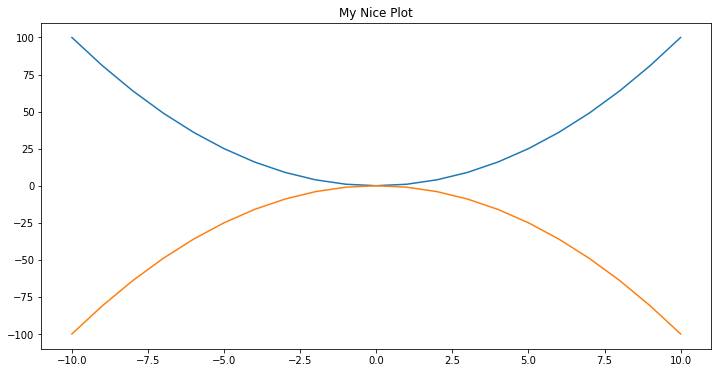

In [152]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

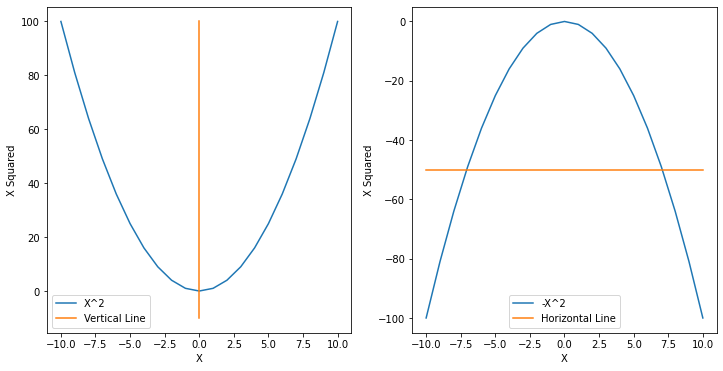

In [154]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

***OOP Interface***

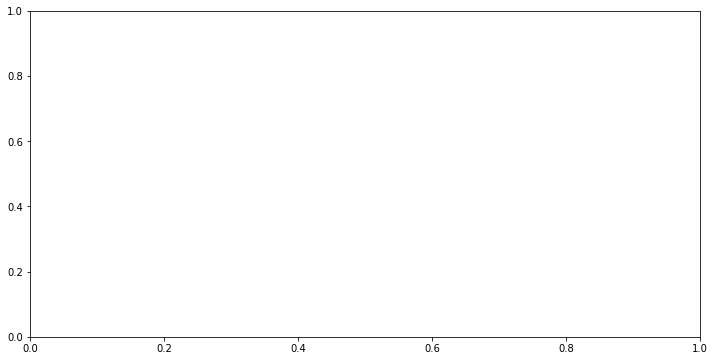

In [155]:
fig, axes = plt.subplots(figsize=(12, 6))

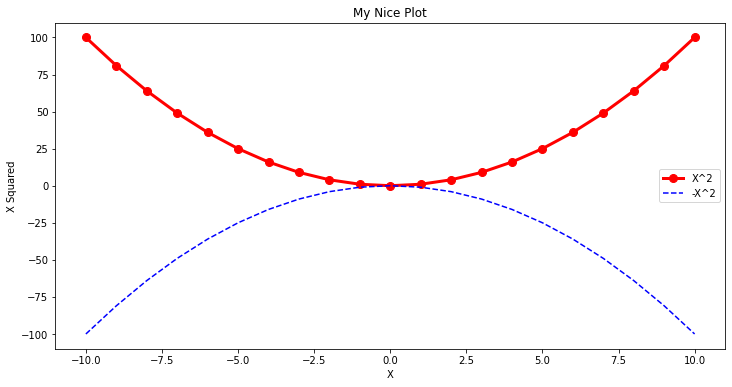

In [156]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

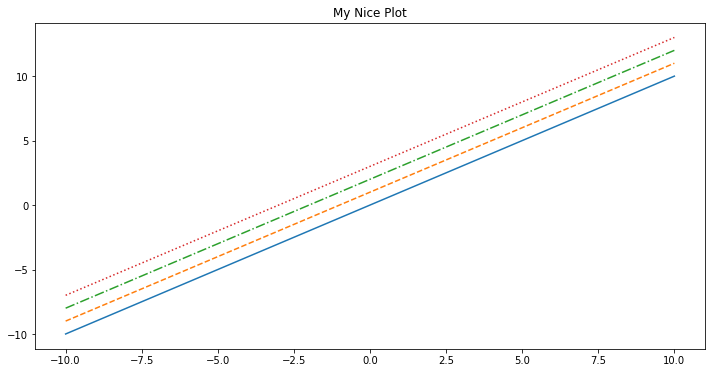

In [157]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

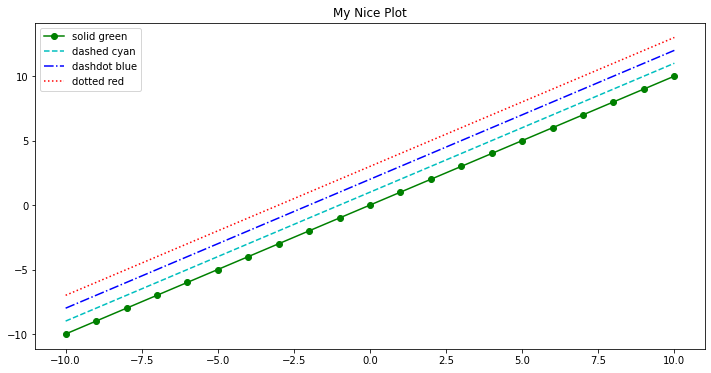

In [158]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

In [159]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


In [160]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']


***Other types of plots***

**Figures and subfigures**

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

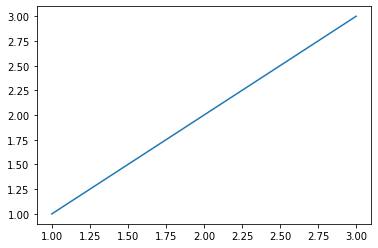

In [161]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

(<Figure size 1008x432 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

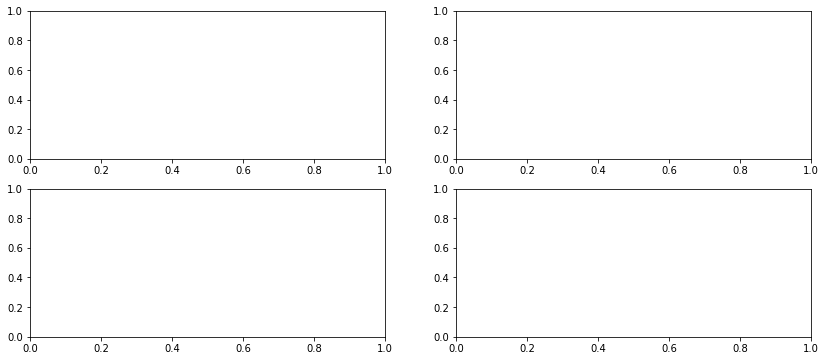

In [162]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

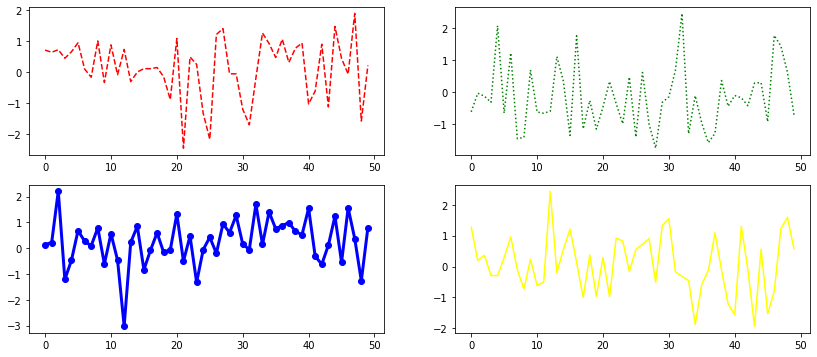

In [163]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


fig

**The subplot2grid command**

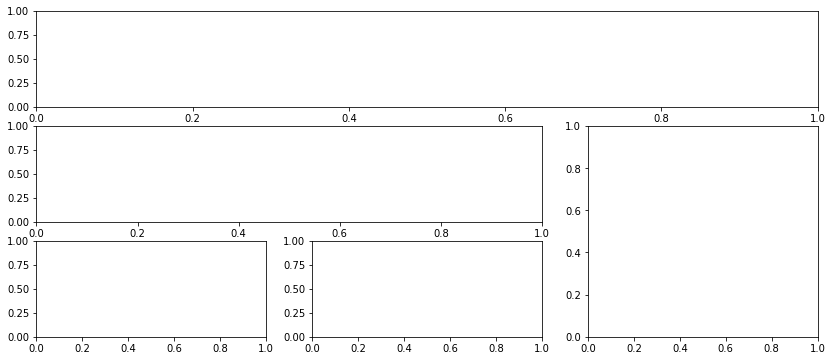

In [164]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

**Scatter Plot**

In [165]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

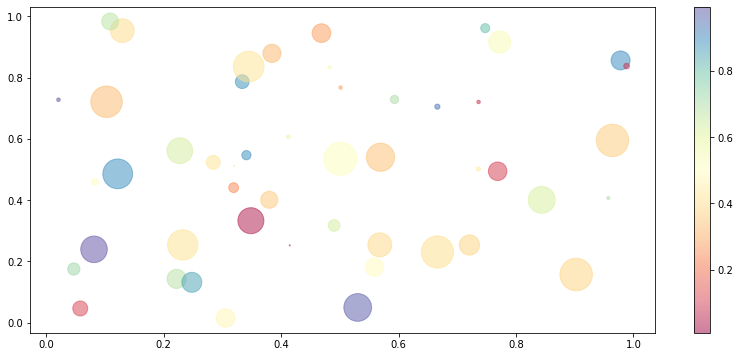

In [166]:
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

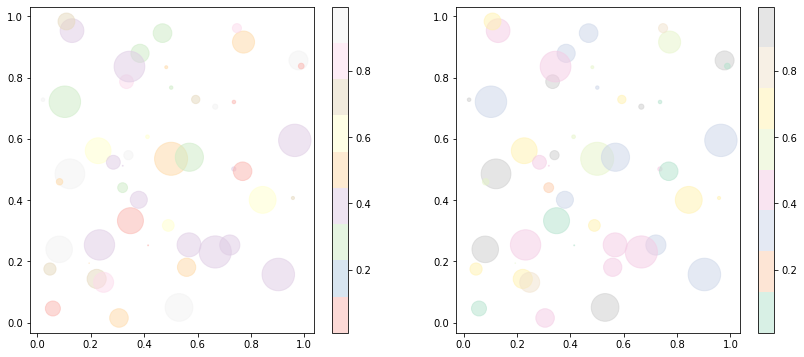

In [167]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

**Histograms**

In [168]:
values = np.random.randn(1000)

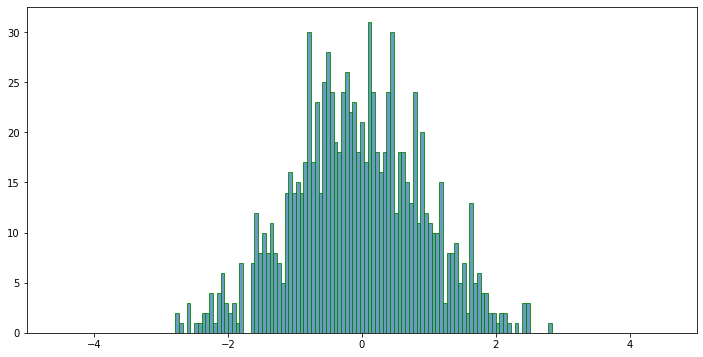

In [169]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [170]:
fig.savefig('hist.png')

**KDE (kernel density estimation)**

In [171]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

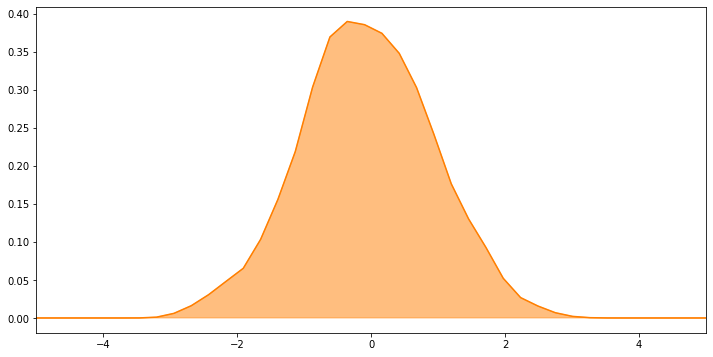

In [175]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

**Combine plots**

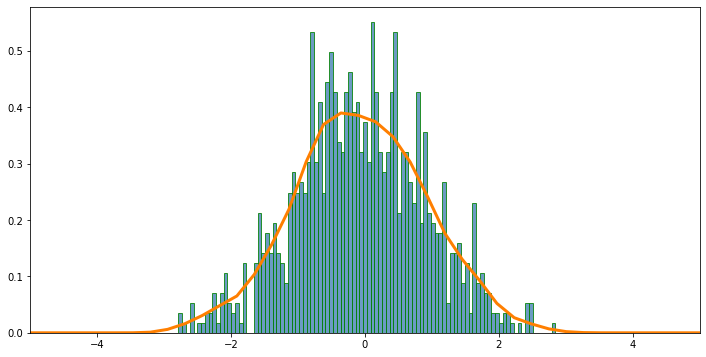

In [176]:
plt.subplots(figsize=(12, 6))
plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

**Bar plots**

In [177]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

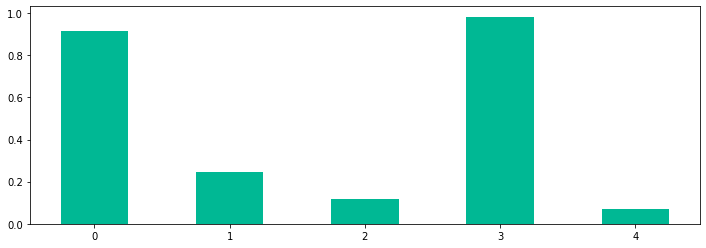

In [178]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

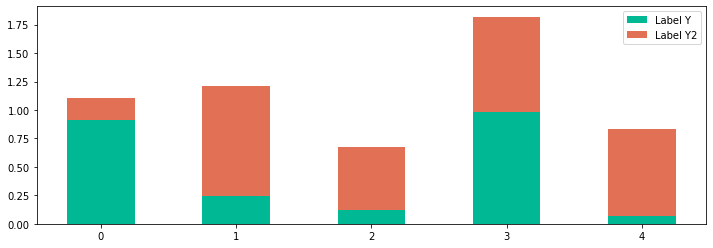

In [179]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

**Boxplots and outlier detection**

In [180]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 4., 6., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <BarContainer object of 10 artists>)

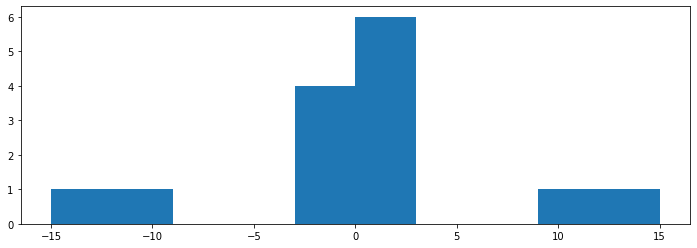

In [181]:
plt.figure(figsize=(12, 4))

plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x2231fdf95f8>,
 'caps': [<matplotlib.lines.Line2D at 0x2231fdf9ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2231fdf9390>],
 'medians': [<matplotlib.lines.Line2D at 0x2231fde9160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2231fe05470>],
 'means': []}

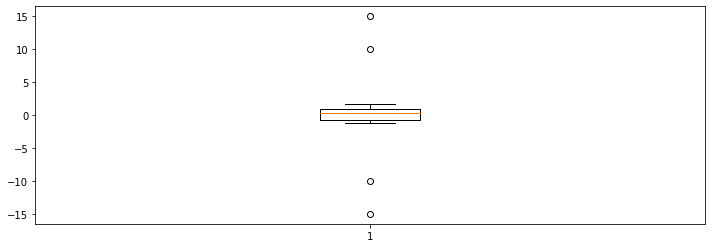

In [182]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)